In [17]:
import os
import cv2
import ast

def extract_subimages(image, coordinates, subimage_size=(224, 224), interpolation=cv2.INTER_LINEAR):
    subimages = []
    height, width, _ = image.shape  # Extract height and width of the original image
    for coord in coordinates:
        if len(coord) < 4:
            print(f"Skipping incomplete coordinate: {coord}")
            continue
        
        x_center, y_center, box_width, box_height = coord[0], coord[1], coord[2], coord[3]
        x1 = int((x_center - box_width / 2) * width)
        y1 = int((y_center - box_height / 2) * height)
        x2 = int((x_center + box_width / 2) * width)
        y2 = int((y_center + box_height / 2) * height)
        
        sub_image = image[y1:y2, x1:x2]
        if sub_image.size == 0:
            print(f"Skipping sub-image due to empty shape: {sub_image.shape}")
            continue
        
        print(f"Sub-image shape before resizing: {sub_image.shape}")
        sub_image_resized = cv2.resize(sub_image, subimage_size, interpolation=interpolation)
        print(f"Sub-image shape after resizing: {sub_image_resized.shape}")
        subimages.append(sub_image_resized)
    return subimages





input_image_folder = "C:/Users/velag/Desktop/Tryp/positive_images/validation/images" # Folder containing images
input_text_folder = "C:/Users/velag/Desktop/Tryp/positive_images/validation/labels"  # Folder containing corresponding text files
output_folder = "C:/Users/velag/Desktop/main/validation/positive"  # Output folder to save sub-images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for image_file in os.listdir(input_image_folder):
    if image_file.endswith(".jpg") or image_file.endswith(".jpeg") or image_file.endswith(".png"):
        # Construct paths for the image and its corresponding text file
        image_path = os.path.join(input_image_folder, image_file)
        text_file_path = os.path.join(input_text_folder, os.path.splitext(image_file)[0] + ".txt")

        # Check if the corresponding text file exists
        if os.path.exists(text_file_path):
            # Read image
            image = cv2.imread(image_path)

            # Read coordinates from text file
            with open(text_file_path, "r") as file:
                data = file.read()
                coordinates_list = [list(map(float, line.strip().split()[1:])) for line in data.strip().split('\n')]

            # Extract sub-images
            subimages = extract_subimages(image, coordinates_list)

            # Save sub-images
            for i, subimage in enumerate(subimages):
                output_path = os.path.join(output_folder, f'{os.path.splitext(image_file)[0]}_subimage_{i}.jpg')
                cv2.imwrite(output_path, subimage)

            #print(f"Sub-images extracted from {image_file} and saved to {output_folder}")
        else:
            print(f"No corresponding text file found for {image_file}")


Sub-image shape before resizing: (39, 31, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (29, 59, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (31, 42, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (32, 28, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (40, 32, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (36, 49, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (49, 54, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (29, 36, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (19, 45, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (42, 27, 3)
Sub-image shape after resizing: (224, 224, 3)
Sub-image shape before resizing: (24, 37, 3)
Sub-image shape after resizing: (224, 224, 3)

In [11]:
import os
import cv2

def extract_subimages(image, coordinates, subimage_size=(224, 224), interpolation=cv2.INTER_LINEAR):
    subimages = []
    height, width, _ = image.shape
    
    # Create a mask to cover the regions specified by coordinates
    mask = image.copy()
    mask[:] = 255
    for coord in coordinates:
        try:
            x_center, y_center, box_width, box_height = coord[0], coord[1], coord[2], coord[3]
        except IndexError:
            print("Invalid coordinate:", coord)
            continue
        x1 = int((x_center - box_width / 2) * width)
        y1 = int((y_center - box_height / 2) * height)
        x2 = int((x_center + box_width / 2) * width)
        y2 = int((y_center + box_height / 2) * height)
        cv2.rectangle(mask, (x1, y1), (x2, y2), (0, 0, 0), -1)  # Black out the specified regions in the mask
    
    # Count the number of mentioned coordinates
    num_coordinates = len(coordinates)
    
    # Determine the maximum number of sub-images to extract from the remaining portion
    max_subimages = num_coordinates + 7  # Adjust as needed
    
    # Extract sub-images for the remaining portions of the image
    contours, _ = cv2.findContours(cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    extracted_subimages = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        for i in range(0, w - subimage_size[0], subimage_size[0]):
            for j in range(0, h - subimage_size[1], subimage_size[1]):
                if extracted_subimages >= max_subimages:
                    return subimages  # Return if max subimages limit reached
                sub_image = image[y + j:y + j + subimage_size[1], x + i:x + i + subimage_size[0]]
                subimages.append(sub_image)
                extracted_subimages += 1
    
    return subimages

# The rest of the code remains unchanged


# The rest of the code remains unchanged


input_image_folder = "C:/Users/velag/Desktop/Tryp/positive_images/validation/images" # Folder containing images
input_text_folder = "C:/Users/velag/Desktop/Tryp/positive_images/validation/labels"  # Folder containing corresponding text files
output_folder = "C:/Users/velag/Desktop/main/main_validation/negative"  # Output folder to save sub-images

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through each image in the input folder
for image_file in os.listdir(input_image_folder):
    if image_file.endswith(".jpg") or image_file.endswith(".jpeg") or image_file.endswith(".png"):
        # Construct paths for the image and its corresponding text file
        image_path = os.path.join(input_image_folder, image_file)
        text_file_path = os.path.join(input_text_folder, os.path.splitext(image_file)[0] + ".txt")

        # Check if the corresponding text file exists
        if os.path.exists(text_file_path):
            # Read image
            image = cv2.imread(image_path)

            # Read coordinates from text file
            with open(text_file_path, "r") as file:
                data = file.read()
                coordinates_list = [list(map(float, line.strip().split()[1:])) for line in data.strip().split('\n')]
                
            # Check if coordinates exist in the text file
            if not coordinates_list:
                print(f"No coordinates found in {text_file_path}. Skipping image {image_file}.")
                continue

            # Extract sub-images
            subimages = extract_subimages(image, coordinates_list)

            # Save sub-images
            for i, subimage in enumerate(subimages):
                output_path = os.path.join(output_folder, f'{os.path.splitext(image_file)[0]}_subimage_{i}.jpg')
                cv2.imwrite(output_path, subimage)

            print(f"Sub-images extracted from {image_file} and saved to {output_folder}")
        else:
            print(f"No corresponding text file found for {image_file}")


Sub-images extracted from positive_video_001_00000049.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_001_00000059.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_001_00000089.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_002_00000056.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_002_00000057.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_002_00000063.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_002_00000067.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-images extracted from positive_video_002_00000130.jpg and saved to C:/Users/velag/Desktop/main/main_validation/negative
Sub-imag

In [61]:
import cv2
import os

def convert_to_coordinates(coord, image_shape):
    x_center_norm, y_center_norm, box_width_norm, box_height_norm = coord[1:]
    width, height, _ = image_shape
    
    # Convert normalized coordinates to pixel coordinates
    x_center_px = int(x_center_norm * width)
    y_center_px = int(y_center_norm * height)
    box_width_px = int(box_width_norm * width)
    box_height_px = int(box_height_norm * height)
    
    # Calculate bounding box coordinates
    x1 = max(0, x_center_px - box_width_px // 2)
    y1 = max(0, y_center_px - box_height_px // 2)
    x2 = min(width, x_center_px + box_width_px // 2)
    y2 = min(height, y_center_px + box_height_px // 2)
    
    return (x1, y1, x2, y2)

def calculate_iou(box1, box2):
    # Calculate intersection coordinates
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])
    
    # Calculate intersection area
    inter_width = max(0, x2_inter - x1_inter + 1)
    inter_height = max(0, y2_inter - y1_inter + 1)
    inter_area = inter_width * inter_height
    
    # Calculate box areas
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    # Calculate IoU
    iou = inter_area / float(box1_area + box2_area - inter_area)
    
    return iou, (x1_inter, y1_inter, x2_inter, y2_inter)

def generate_labels(image_path, provided_coordinates, sub_image_size=(224, 224), overlap_size=(112, 112), threshold=0.2):
    # Read the input image
    image = cv2.imread(image_path)
    
    # Get image dimensions
    height, width, _ = image.shape
    
    labels = []
    
    # Convert provided coordinates to (x1, y1, x2, y2) format
    provided_coords = [convert_to_coordinates(coord, image.shape) for coord in provided_coordinates]
    
    # Define the step size for overlapping
    step_x = sub_image_size[1] - overlap_size[1]
    step_y = sub_image_size[0] - overlap_size[0]
    
    # Generate sub-images and their labels
    for y in range(0, height - sub_image_size[0] + 1, step_y):
        for x in range(0, width - sub_image_size[1] + 1, step_x):
            # Coordinates for the bounding box
            x_center = (x + sub_image_size[1] / 2) / width
            y_center = (y + sub_image_size[0] / 2) / height
            box_width = sub_image_size[1] / width
            box_height = sub_image_size[0] / height
            
            # Compute coordinates (x1, y1, x2, y2)
            x1 = int((x_center - box_width / 2) * width)
            y1 = int((y_center - box_height / 2) * height)
            x2 = int((x_center + box_width / 2) * width)
            y2 = int((y_center + box_height / 2) * height)
            
            sub_image_coords = (x1, y1, x2, y2)
            intersecting_coords = []
            max_iou = 0.0
            is_positive = False
            
            # Check for overlapping with provided coordinates
            for provided_coord in provided_coords:
                iou, intersection = calculate_iou(provided_coord, sub_image_coords)
                if iou > threshold:
                    is_positive = True
                    intersecting_coords.append(intersection)
                    max_iou = max(max_iou, iou)
            
            labels.append((sub_image_coords, is_positive, intersecting_coords, max_iou))
    
    return labels

# Example usage:
image_path = "C:/Users/velag/Desktop/positive_video_065_00000572.jpg"
provided_coordinates = [
    [0, 0.656586, 0.300157, 0.065255, 0.057722],
    [0, 0.487109, 0.370491, 0.041927, 0.050241],
    [0, 0.439013, 0.370625, 0.037401, 0.076435],
    [0, 0.507365, 0.301106, 0.020979, 0.078139],
    [0, 0.681266, 0.506014, 0.042740, 0.049065],
    [0, 0.636609, 0.728000, 0.050302, 0.046741],
    [0, 0.567643, 0.942023, 0.045703, 0.056269],
    [0, 0.312729, 0.594250, 0.072333, 0.058870],
    [0, 0.723983, 0.562213, 0.026042, 0.070547]
]  # Add your provided coordinates here

# Adjust the threshold as needed, for example:
threshold = 0.000000001

labels = generate_labels(image_path, provided_coordinates, threshold=threshold)

positive_patches_folder = "positive_patches"
negative_patches_folder = "negative_patches"

if not os.path.exists(positive_patches_folder):
    os.makedirs(positive_patches_folder)

if not os.path.exists(negative_patches_folder):
    os.makedirs(negative_patches_folder)

for i, (sub_image_coords, is_positive, intersecting_coords, max_iou) in enumerate(labels, 1):
    if is_positive:
        output_folder = positive_patches_folder
    else:
        output_folder = negative_patches_folder
    
    x1, y1, x2, y2 = sub_image_coords
    sub_image = image[y1:y2, x1:x2]
    cv2.imwrite(os.path.join(output_folder, f"patch_{i}.jpg"), sub_image)
    
    print(f"Sub-image {i} IoU:", max_iou)


Sub-image 1 IoU: 0.0
Sub-image 2 IoU: 0.0
Sub-image 3 IoU: 0.0
Sub-image 4 IoU: 0.0
Sub-image 5 IoU: 0.0
Sub-image 6 IoU: 0.0
Sub-image 7 IoU: 0.0
Sub-image 8 IoU: 0.0
Sub-image 9 IoU: 0.0
Sub-image 10 IoU: 0.0
Sub-image 11 IoU: 0.0
Sub-image 12 IoU: 0.0
Sub-image 13 IoU: 0.0
Sub-image 14 IoU: 0.0
Sub-image 15 IoU: 0.0
Sub-image 16 IoU: 0.0
Sub-image 17 IoU: 0.0
Sub-image 18 IoU: 0.0
Sub-image 19 IoU: 0.0
Sub-image 20 IoU: 0.0
Sub-image 21 IoU: 0.0
Sub-image 22 IoU: 0.0
Sub-image 23 IoU: 0.0
Sub-image 24 IoU: 0.0
Sub-image 25 IoU: 0.0
Sub-image 26 IoU: 0.0
Sub-image 27 IoU: 0.0
Sub-image 28 IoU: 0.0
Sub-image 29 IoU: 0.0
Sub-image 30 IoU: 0.0
Sub-image 31 IoU: 0.0
Sub-image 32 IoU: 0.0
Sub-image 33 IoU: 0.0
Sub-image 34 IoU: 0.0
Sub-image 35 IoU: 0.0
Sub-image 36 IoU: 0.0
Sub-image 37 IoU: 0.0
Sub-image 38 IoU: 0.0
Sub-image 39 IoU: 0.0
Sub-image 40 IoU: 0.0
Sub-image 41 IoU: 0.0
Sub-image 42 IoU: 0.0
Sub-image 43 IoU: 0.0
Sub-image 44 IoU: 0.0
Sub-image 45 IoU: 0.0
Sub-image 46 IoU: 0

In [45]:
coord = [0, 0.656586, 0.300157, 0.065255, 0.057722]
convert_to_coordinates(coord,image.shape)

(673, 520, 744, 631)

In [56]:
import cv2

# Function to handle mouse events
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        print(f"Coordinates: ({x}, {y})")

# Read the image
image = cv2.imread("C:/Users/velag/Desktop/positive_video_065_00000572.jpg")  # Replace "your_image.jpg" with your image path

# Create a window and set the mouse callback function
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)

# Display the image
cv2.imshow("Image", image)

# Wait for any key to be pressed
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()


Coordinates: (60, 153)
Coordinates: (60, 153)
Coordinates: (69, 151)
Coordinates: (86, 147)
Coordinates: (108, 142)
Coordinates: (134, 135)
Coordinates: (161, 131)
Coordinates: (192, 127)
Coordinates: (226, 124)
Coordinates: (259, 123)
Coordinates: (297, 123)
Coordinates: (332, 123)
Coordinates: (367, 123)
Coordinates: (403, 123)
Coordinates: (439, 125)
Coordinates: (470, 127)
Coordinates: (502, 127)
Coordinates: (532, 127)
Coordinates: (559, 127)
Coordinates: (585, 124)
Coordinates: (610, 123)
Coordinates: (634, 120)
Coordinates: (654, 115)
Coordinates: (672, 113)
Coordinates: (690, 111)
Coordinates: (704, 108)
Coordinates: (717, 107)
Coordinates: (730, 106)
Coordinates: (742, 106)
Coordinates: (754, 106)
Coordinates: (766, 107)
Coordinates: (777, 107)
Coordinates: (789, 110)
Coordinates: (798, 112)
Coordinates: (807, 115)
Coordinates: (815, 117)
Coordinates: (822, 120)
Coordinates: (830, 123)
Coordinates: (834, 125)
Coordinates: (838, 126)
Coordinates: (839, 127)
Coordinates: (841, 1

In [55]:
def find_coordinates(label_list, image_size):
    coordinates_list = []
    for label in label_list:
        x_center_norm, y_center_norm, box_width_norm, box_height_norm = label
        image_width, image_height = image_size
        
        # Convert normalized coordinates to pixel coordinates
        x_center_px = int(x_center_norm * image_width)
        y_center_px = int(y_center_norm * image_height)
        box_width_px = int(box_width_norm * image_width)
        box_height_px = int(box_height_norm * image_height)
        
        # Calculate bounding box coordinates
        x1 = max(0, x_center_px - box_width_px // 2)
        y1 = max(0, y_center_px - box_height_px // 2)
        x2 = min(image_width, x_center_px + box_width_px // 2)
        y2 = min(image_height, y_center_px + box_height_px // 2)
        
        coordinates_list.append((x1, y1, x2, y2))
    
    return coordinates_list

# Given list of labels
label_list = [
    (0.656586, 0.300157, 0.065255, 0.057722),
    (0.487109, 0.370491, 0.041927, 0.050241),
    (0.439013, 0.370625, 0.037401, 0.076435),
    (0.507365, 0.301106, 0.020979, 0.078139),
    (0.681266, 0.506014, 0.042740, 0.049065),
    (0.636609, 0.728000, 0.050302, 0.046741),
    (0.567643, 0.942023, 0.045703, 0.056269),
    (0.312729, 0.594250, 0.072333, 0.058870),
    (0.723983, 0.562213, 0.026042, 0.070547)
]
image_size = (1920, 1080)

# Find coordinates
coordinates_list = find_coordinates(label_list, image_size)
for i, coordinates in enumerate(coordinates_list, 1):
    print(f"Label {i} Coordinates:", coordinates)


Label 1 Coordinates: (1198, 293, 1322, 355)
Label 2 Coordinates: (895, 373, 975, 427)
Label 3 Coordinates: (807, 359, 877, 441)
Label 4 Coordinates: (954, 283, 994, 367)
Label 5 Coordinates: (1267, 520, 1349, 572)
Label 6 Coordinates: (1174, 761, 1270, 811)
Label 7 Coordinates: (1046, 987, 1132, 1047)
Label 8 Coordinates: (531, 610, 669, 672)
Label 9 Coordinates: (1365, 569, 1415, 645)


In [4]:
import cv2
import os

def generate_sub_images(input_image_path, output_folder_path, sub_image_size=(112, 112), overlap_size=(56, 56)):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    image = cv2.imread(input_image_path)
    height, width, _ = image.shape

    # Calculate number of sub-images in rows and columns
    num_rows = (height - sub_image_size[0]) // overlap_size[0] + 1
    num_cols = (width - sub_image_size[1]) // overlap_size[1] + 1

    # Generate sub-images
    patch_counter = 0
    for i in range(num_rows):
        for j in range(num_cols):
            # Calculate starting point of the sub-image
            start_x = j * overlap_size[1]
            start_y = i * overlap_size[0]

            # Calculate ending point of the sub-image
            end_x = min(start_x + sub_image_size[1], width)
            end_y = min(start_y + sub_image_size[0], height)

            # Crop the sub-image
            sub_image = image[start_y:end_y, start_x:end_x]

            # Resize the sub-image to 224x224
            sub_image_resized = cv2.resize(sub_image, (224, 224))

            # Save the resized sub-image
            sub_image_name = f"patch_{patch_counter}.png"
            cv2.imwrite(os.path.join(output_folder_path, sub_image_name), sub_image_resized)
            patch_counter += 1

if __name__ == "__main__":
    input_image_path = "C:/Users/velag/Desktop/positive_video_065_00000572.jpg"
    output_folder_path = "sub_images2"
    generate_sub_images(input_image_path, output_folder_path)


In [2]:
pip install engine

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement engine (from versions: none)
ERROR: No matching distribution found for engine


In [5]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
import torchvision.transforms as transforms

# Define the collate function
def collate_fn(batch):
    return tuple(zip(*batch))

# Define the engine for training and evaluation
def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.train()
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

def evaluate(model, data_loader, device):
    model.eval()
    metric_logger = utils.MetricLogger(delimiter="  ")
    header = 'Test:'

    for images, targets in metric_logger.log_every(data_loader, 100, header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        with torch.no_grad():
            output = model(images)

        metric_logger.update(loss=0)

# Define the dataset paths
train_data_path = "C:/Users/velag/Desktop/main/main_train"
test_data_path = "C:/Users/velag/Desktop/main/main_test"
validation_data_path = "C:/Users/velag/Desktop/main/main_validation"

# Define the transformation to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Define the dataset
train_dataset = ImageFolder(train_data_path, transform=transform)
test_dataset = ImageFolder(test_data_path, transform=transform)
validation_dataset = ImageFolder(validation_data_path, transform=transform)

# Define the dataloaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=1, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=1, collate_fn=collate_fn)
validation_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False, num_workers=1, collate_fn=collate_fn)

# Load a pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Modify the number of classes in the model's classification head
num_classes = len(train_dataset.classes)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Define the optimizer and the learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Define the device to train on
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Move the model to the device
model.to(device)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # Update the learning rate
    lr_scheduler.step()

# Evaluate the model on the test set
evaluate(model, test_loader, device=device)

# Evaluate the model on the validation set
evaluate(model, validation_loader, device=device)


RuntimeError: DataLoader worker (pid(s) 11556) exited unexpectedly

In [20]:
# libraries for NLTK

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk

# Specify the data path explicitly
nltk.data.path.append("/usr/share/nltk_data")

# Now import WordNet
from nltk.corpus import wordnet
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#libraries for tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
# random libraries for shuffle our features
import random
#pickle
import pickle
#json to import the intents file
import json

# Loading intents
data_file = open("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/intents.json", encoding='utf-8').read()
intents = json.loads(data_file)

# Extracting words and classes from intents
words = []
classes = []
documents = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Lemmatize and lower each word and remove stopwords and duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in stopwords.words('english')]
words = sorted(list(set(words)))
# Remove duplicates from classes
classes = sorted(list(set(classes)))

# Save words and classes to files
pickle.dump(words, open("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/words.pkl", 'wb'))
pickle.dump(classes, open("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/classes.pkl", 'wb'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\velag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\velag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# Shuffle our features
random.shuffle(training)

# Convert training data to numpy arrays
train_x = np.array([x[0] for x in training])
train_y = np.array([x[1] for x in training])

print("Training data created successfully.")


Training data created successfully.


In [22]:
# Create model 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer ce equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=5, verbose=1)
model.save("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/model.h5", hist)
print("Model created successfully.")


Epoch 1/500


47/47 [==============================] - 2s 2ms/step - loss: 4.3908 - accuracy: 0.0086
Epoch 2/500
47/47 [==============================] - 0s 2ms/step - loss: 4.3022 - accuracy: 0.0345
Epoch 3/500
47/47 [==============================] - 0s 2ms/step - loss: 4.1953 - accuracy: 0.0819
Epoch 4/500
47/47 [==============================] - 0s 2ms/step - loss: 4.1313 - accuracy: 0.0862
Epoch 5/500
47/47 [==============================] - 0s 2ms/step - loss: 4.0092 - accuracy: 0.0905
Epoch 6/500
47/47 [==============================] - 0s 2ms/step - loss: 3.9205 - accuracy: 0.1250
Epoch 7/500
47/47 [==============================] - 0s 2ms/step - loss: 3.7881 - accuracy: 0.1207
Epoch 8/500
47/47 [==============================] - 0s 2ms/step - loss: 3.6989 - accuracy: 0.1207
Epoch 9/500
47/47 [==============================] - 0s 2ms/step - loss: 3.5913 - accuracy: 0.1422
Epoch 10/500
47/47 [==============================] - 0s 2ms/step - loss: 3.4275 - accuracy: 0.1595
Epoch 1

C:\Users\velag\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


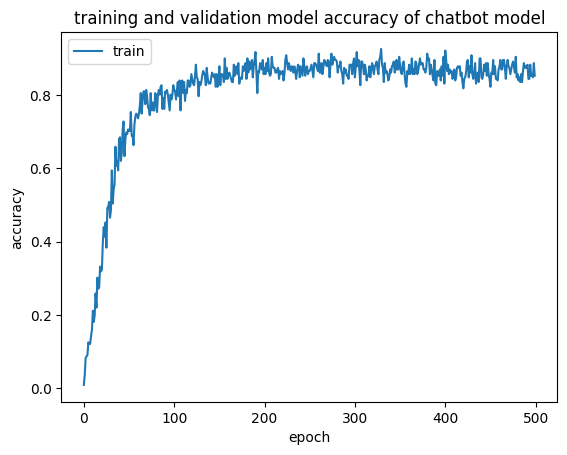

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title("training and validation model accuracy of chatbot model")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

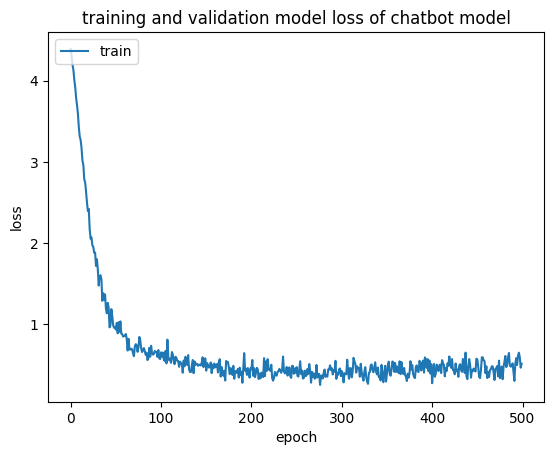

In [24]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title("training and validation model loss of chatbot model")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
import numpy as np
import pickle
import json
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import random

# Load preprocessed data
words = pickle.load(open("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/words.pkl", 'rb'))
classes = pickle.load(open("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/classes.pkl", 'rb'))
model = load_model("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/model.h5")

# Load intents file
intents = json.loads(open("C:/Users/velag/Desktop/Music-me-Chatbot_song_recommendor_system--main/files required/intents.json").read())

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_up_sentence(sentence):
    # Tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # Lemmatize each word and remove stopwords
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words if word not in stopwords.words('english')]
    return sentence_words

def bow(sentence, words, show_details=True):
    # Tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # Bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i, w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print("found in bag: %s" % w)

    return(np.array(bag))

def predict_class(sentence):
    # Filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    # Sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def get_response(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag'] == tag):
            result = random.choice(i['responses'])
            break
    return result

# Start conversation
print("Chatbot is running. Type 'quit' to exit.")
# Initial greeting by the bot
print("Bot:", random.choice(["Hello! How's your day going?", "Hi there! How are you today?"]))
while True:
    user_input = input("You: ")
    if user_input.lower() == 'quit':
        print("Goodbye!")
        break
    
    # Get chatbot's response
    ints = predict_class(user_input)
    res = get_response(ints, intents)
    print("Bot:", res)


Chatbot is running. Type 'quit' to exit.
Bot: Hi there! How are you today?
1/1 [==============================] - 0s 63ms/step
Bot: Great to see you. How do you feel currently?
Goodbye!


In [19]:
import pickle
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


# Load tokenizer and label encoder
with open('C:/Users/velag/Downloads/tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

with open('C:/Users/velag/Downloads/labelEncoder.pickle', 'rb') as f:
    le = pickle.load(f)

# Load model
model = load_model('C:/Users/velag/Downloads/Emotion Recognition.h5')

# Now you can use the tokenizer, label encoder, and model to make predictions
def predict_emotion(text):
    # Tokenize the text
    text_sequence = tokenizer.texts_to_sequences([text])
    
    # Pad sequences
    padded_sequence = pad_sequences(text_sequence, maxlen=256, padding='post')
    
    # Make prediction
    prediction = model.predict(padded_sequence)
    
    # Get the predicted label
    predicted_label = le.inverse_transform([np.argmax(prediction)])
    
    return predicted_label[0]

# Example usage
text_to_predict = "I'm terrified of what might happen next"
predicted_emotion = predict_emotion(text_to_predict)
print("Predicted emotion:", predicted_emotion)


1/1 [==============================] - 2s 2s/step
Predicted emotion: fear
